In [1]:
# IMPORTING PACKAGES

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
import yfinance as yf

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [2]:
# # EXTRACTING STOCK DATA

# def get_historical_data(symbol, start_date):
#     api_key = 'YOUR API KEY'
#     api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&interval=1day&outputsize=5000&apikey={api_key}'
#     raw_df = requests.get(api_url).json()
#     df = pd.DataFrame(raw_df['values']).iloc[::-1].set_index('datetime').astype(float)
#     df = df[df.index >= start_date]
#     df.index = pd.to_datetime(df.index)
#     return df

# aapl = get_historical_data('AAPL', '2010-01-01')
# aapl.tail()

In [3]:
df0 = yf.download('SBIN.NS', start='2020-01-01')
df = df0.reset_index()
#Rename cols
df = df.rename({'Date': 'date','Open': 'open','High': 'high','Low': 'low','Close': 'close','Adj Close': 'adjusted_close','Volume': 'volume'},axis=1)

[*********************100%***********************]  1 of 1 completed


In [4]:
# BOLLINGER BANDS CALCULATION

def sma(data, lookback):
    sma = data.rolling(lookback).mean()
    return sma

def get_bb(data, lookback):
    std = data.rolling(lookback).std()
    upper_bb = sma(data, lookback) + std * 2
    lower_bb = sma(data, lookback) - std * 2
    middle_bb = sma(data, lookback)
    return upper_bb, lower_bb, middle_bb

df['upper_bb'], df['middle_bb'], df['lower_bb'] = get_bb(df['close'], 20)
df = df.dropna()
df.tail()

,date,open,high,low,close,adjusted_close,volume,upper_bb,middle_bb,lower_bb
660,2022-08-26,523.799988,529.500000,522.200012,523.799988,523.799988,12855886,542.858052,510.726945,526.792499
661,2022-08-29,511.299988,517.000000,508.750000,514.849976,514.849976,9421339,542.589698,509.235296,525.912497
662,2022-08-30,518.200012,532.500000,517.950012,531.250000,531.250000,14835308,542.873781,509.241215,526.057498
663,2022-09-01,522.250000,540.900024,522.250000,533.299988,533.299988,16670228,542.809094,509.260901,526.034998
664,2022-09-02,537.000000,537.849976,531.250000,536.700012,536.700012,10017930,541.597744,509.932255,525.764999


In [5]:
# STOCHASTIC OSCILLATOR CALCULATION

def get_stoch_osc(high, low, close, k_lookback, d_lookback):
    lowest_low = low.rolling(k_lookback).min()
    highest_high = high.rolling(k_lookback).max()
    k_line = ((close - lowest_low) / (highest_high - lowest_low)) * 100
    d_line = k_line.rolling(d_lookback).mean()
    return k_line, d_line

df['%k'], df['%d'] = get_stoch_osc(df['high'], df['low'], df['close'], 14, 3)
df.tail()

,date,open,high,low,close,adjusted_close,volume,upper_bb,middle_bb,lower_bb,%k,%d
660,2022-08-26,523.799988,529.500000,522.200012,523.799988,523.799988,12855886,542.858052,510.726945,526.792499,44.877278,35.942641
661,2022-08-29,511.299988,517.000000,508.750000,514.849976,514.849976,9421339,542.589698,509.235296,525.912497,24.858677,34.574012
662,2022-08-30,518.200012,532.500000,517.950012,531.250000,531.250000,14835308,542.873781,509.241215,526.057498,86.629042,52.121665
663,2022-09-01,522.250000,540.900024,522.250000,533.299988,533.299988,16670228,542.809094,509.260901,526.034998,76.722723,62.736814
664,2022-09-02,537.000000,537.849976,531.250000,536.700012,536.700012,10017930,541.597744,509.932255,525.764999,87.136266,83.496010


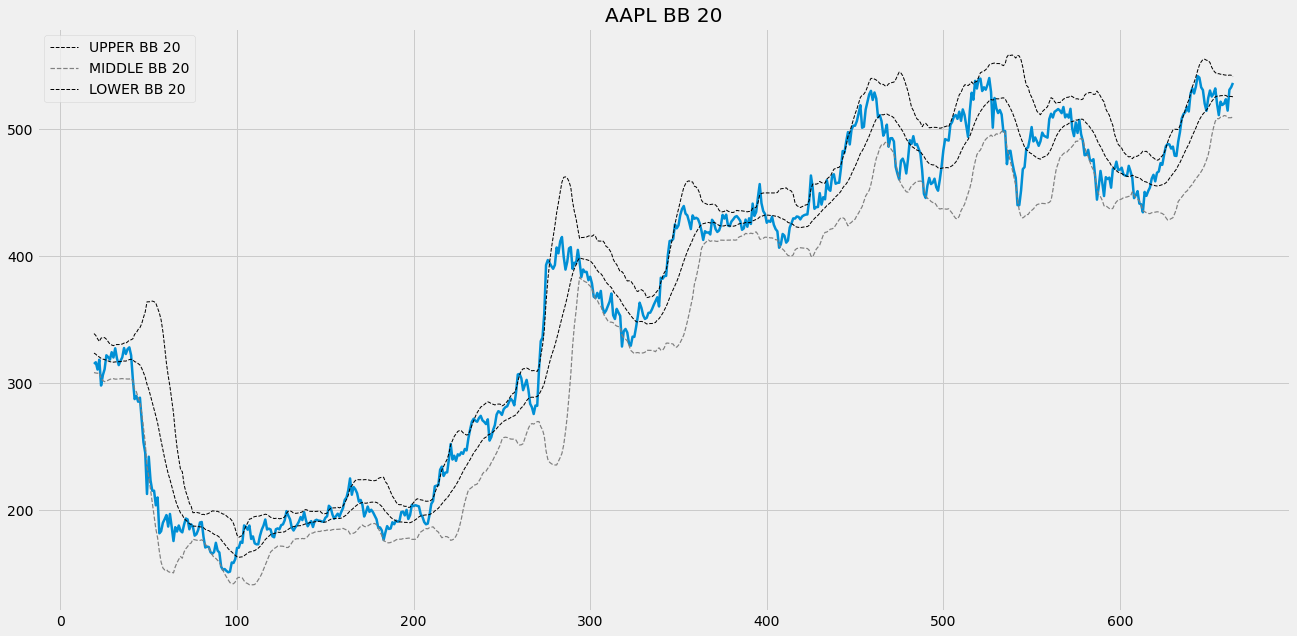

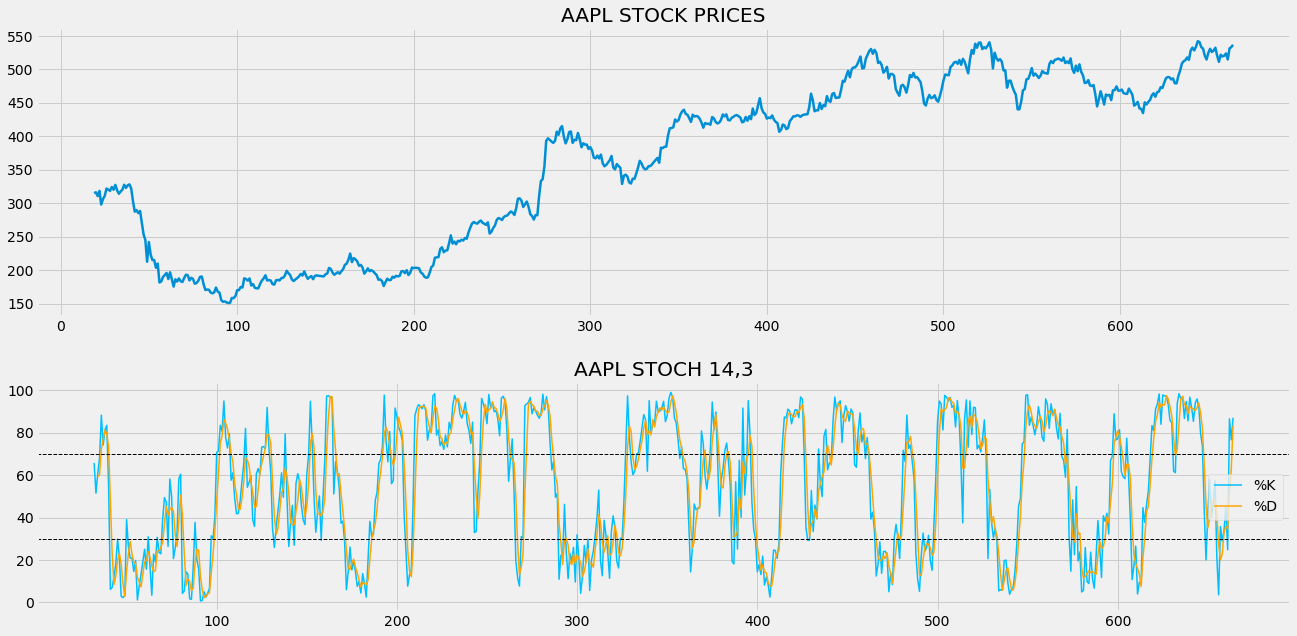

In [6]:
# PLOTTING THE DATA

plot_data = df[df.date >= '2020-01-01']

plt.plot(plot_data['close'], linewidth = 2.5)
plt.plot(plot_data['upper_bb'], label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.plot(plot_data['middle_bb'], label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
plt.plot(plot_data['lower_bb'], label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.title('AAPL BB 20')
plt.legend(loc = 'upper left')
plt.show()

ax1 = plt.subplot2grid((14,1), (0,0), rowspan = 7, colspan = 1)
ax2 = plt.subplot2grid((15,1), (9,0), rowspan = 6, colspan = 1)
ax1.plot(plot_data['close'], linewidth = 2.5)
ax1.set_title('AAPL STOCK PRICES')
ax2.plot(plot_data['%k'], color = 'deepskyblue', linewidth = 1.5, label = '%K')
ax2.plot(plot_data['%d'], color = 'orange', linewidth = 1.5, label = '%D')
ax2.axhline(70, color = 'black', linewidth = 1, linestyle = '--')
ax2.axhline(30, color = 'black', linewidth = 1, linestyle = '--')
ax2.set_title(f'AAPL STOCH 14,3')
ax2.legend(loc = 'right')
plt.show()

In [15]:
df = df.dropna()
df

,date,open,high,low,close,adjusted_close,volume,upper_bb,middle_bb,lower_bb,%k,%d
34,2020-02-18,315.399994,319.200012,309.399994,317.549988,309.810089,38588583,330.529054,303.450954,316.990004,60.738684,59.370723
35,2020-02-19,322.299988,324.000000,317.250000,320.350006,312.541840,39846727,330.814277,303.585732,317.200005,68.399476,60.237127
36,2020-02-20,319.350006,329.200012,318.750000,327.649994,319.663940,40150409,331.584105,303.260903,317.422504,88.372089,72.503416
37,2020-02-24,325.750000,331.299988,321.850006,322.950012,315.078491,45273936,331.428921,303.306088,317.367505,74.281653,77.017739
38,2020-02-25,325.899994,328.149994,322.200012,326.799988,318.834656,39050709,332.559858,303.235149,317.897504,81.318651,81.324131
...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-08-26,523.799988,529.500000,522.200012,523.799988,523.799988,12855886,542.858052,510.726945,526.792499,44.877278,35.942641
661,2022-08-29,511.299988,517.000000,508.750000,514.849976,514.849976,9421339,542.589698,509.235296,525.912497,24.858677,34.574012
662,2022-08-30,518.200012,532.500000,517.950012,531.250000,531.250000,14835308,542.873781,509.241215,526.057498,86.629042,52.121665
663,2022-09-01,522.250000,540.900024,522.250000,533.299988,533.299988,16670228,542.809094,509.260901,526.034998,76.722723,62.736814


In [34]:
df['%k']

35    68.399476
36    88.372089
Name: %k, dtype: float64

In [22]:
for i in range(len(df['close'])):
    if df['%k'][i-1] > 30:
        print(df['close'])

KeyError: 0

In [13]:
# TRADING STRATEGY

def bb_stoch_strategy(prices, k, d, upper_bb, lower_bb):
    buy_price = []
    sell_price = []
    bb_stoch_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if k[i-1] > 30 and d[i-1] > 30 and k[i] < 30 and d[i] < 30 and prices[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                bb_stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_stoch_signal.append(0)
        elif k[i-1] < 70 and d[i-1] < 70 and k[i] > 70 and d[i] > 70 and prices[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                bb_stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_stoch_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_stoch_signal.append(0)
    
    sell_price[-1] = prices[-1]
    bb_stoch_signal[-1] = -1
    return buy_price, sell_price, bb_stoch_signal

In [14]:
buy_price, sell_price, bb_stoch_signal = bb_stoch_strategy(df['close'], df['%k'], df['%d'], df['upper_bb'], df['lower_bb'])

KeyError: -1

In [ ]:
# PLOTTING TRADING SIGNALS

ax1 = plt.subplot2grid((14,1), (0,0), rowspan = 7, colspan = 1)
ax2 = plt.subplot2grid((15,1), (9,0), rowspan = 6, colspan = 1)
ax1.plot(aapl['close'], linewidth = 2.5)
ax1.plot(aapl['upper_bb'], label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
ax1.plot(aapl['middle_bb'], label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
ax1.plot(aapl['lower_bb'], label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
ax1.plot(aapl.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(aapl.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('AAPL BB 20')
ax1.legend(loc = 'right')
ax2.plot(aapl['%k'], color = 'deepskyblue', linewidth = 1.5, label = '%K')
ax2.plot(aapl['%d'], color = 'orange', linewidth = 1.5, label = '%D')
ax2.axhline(70, color = 'black', linewidth = 1, linestyle = '--')
ax2.axhline(30, color = 'black', linewidth = 1, linestyle = '--')
ax2.set_title(f'AAPL STOCH 14,3')
ax2.legend()
plt.show()

In [ ]:
# POSITION

position = []
for i in range(len(bb_stoch_signal)):
    if bb_stoch_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(aapl['close'])):
    if bb_stoch_signal[i] == 1:
        position[i] = 1
    elif bb_stoch_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
k = aapl['%k']
d = aapl['%d']
upper_bb = aapl['upper_bb'] 
lower_bb = aapl['lower_bb']
close_price = aapl['close']
bb_stoch_signal = pd.DataFrame(bb_stoch_signal).rename(columns = {0:'bb_stoch_signal'}).set_index(aapl.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_stoch_position'}).set_index(aapl.index)

frames = [close_price, k, d, upper_bb, lower_bb, bb_stoch_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.tail()

In [ ]:
# BACKTESTING

aapl_ret = pd.DataFrame(np.diff(aapl['close'])).rename(columns = {0:'returns'})
bb_stoch_strategy_ret = []

for i in range(len(aapl_ret)):
    returns = aapl_ret['returns'][i]*strategy['bb_stoch_position'][i]
    bb_stoch_strategy_ret.append(returns)
    
bb_stoch_strategy_ret_df = pd.DataFrame(bb_stoch_strategy_ret).rename(columns = {0:'bb_stoch_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/aapl['close'][0])
bb_stoch_investment_ret = []

for i in range(len(bb_stoch_strategy_ret_df['bb_stoch_returns'])):
    returns = number_of_stocks*bb_stoch_strategy_ret_df['bb_stoch_returns'][i]
    bb_stoch_investment_ret.append(returns)

bb_stoch_investment_ret_df = pd.DataFrame(bb_stoch_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_stoch_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB STOCH strategy by investing $100k in AAPL : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB STOCH strategy : {}%'.format(profit_percentage), attrs = ['bold']))

In [ ]:
# # SPY ETF COMPARISON

# def get_benchmark(start_date, investment_value):
#     spy = get_historical_data('SPY', start_date)['close']
#     benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})
    
#     investment_value = investment_value
#     number_of_stocks = floor(investment_value/spy[0])
#     benchmark_investment_ret = []
    
#     for i in range(len(benchmark['benchmark_returns'])):
#         returns = number_of_stocks*benchmark['benchmark_returns'][i]
#         benchmark_investment_ret.append(returns)

#     benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
#     return benchmark_investment_ret_df

# benchmark = get_benchmark('2010-01-01', 100000)
# investment_value = 100000
# total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
# benchmark_profit_percentage = floor((total_benchmark_investment_ret/investment_value)*100)
# print(cl('Benchmark profit by investing $100k : {}'.format(total_benchmark_investment_ret), attrs = ['bold']))
# print(cl('Benchmark Profit percentage : {}%'.format(benchmark_profit_percentage), attrs = ['bold']))
# print(cl('BB STOCH Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage), attrs = ['bold']))